In [2]:
import pandas as pd
import numpy as np

# Prepare the data:

The data bellow is a modified and augemented version of the stop and frisk NYPD dataset that is opensource: https://opendata.cityofnewyork.us/data/ \
Demographic information was augmented to the stop and frisk dataset in order to accound for different socio economic factos that are at play

In [3]:
# Load the saved data
model_data = pd.read_csv('model_data.csv')

In [4]:
model_data.head()

,BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG,SUSPECT_REPORTED_AGE,Median_Income,Perc_Black,Day_of_Month,Hour_sin,Hour_cos,Day_of_Week_sin,Day_of_Week_cos,Month_sin,...,SUSPECT_RACE_DESCRIPTION_WHITE,SUSPECT_RACE_DESCRIPTION_WHITE HISPANIC,SUSPECT_BODY_BUILD_TYPE_MED,SUSPECT_BODY_BUILD_TYPE_THN,SUSPECT_BODY_BUILD_TYPE_U,SUSPECT_BODY_BUILD_TYPE_XXX,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island
0,0,21.0,19274,0.742,1,8.660254e-01,-0.500000,-0.974928,-0.222521,0.5,...,0,0,0,0,1,0,1,0,0,0
1,0,25.0,15510,0.282,1,7.071068e-01,0.707107,-0.974928,-0.222521,0.5,...,0,0,1,0,0,0,0,0,0,0
2,0,15.0,15510,0.282,1,0.000000e+00,1.000000,-0.974928,-0.222521,0.5,...,0,0,0,1,0,0,0,0,0,0
3,1,30.0,26136,0.655,1,5.000000e-01,-0.866025,-0.974928,-0.222521,0.5,...,0,0,0,1,0,0,0,0,0,0
4,0,50.0,19345,0.106,1,1.224647e-16,-1.000000,-0.974928,-0.222521,0.5,...,0,0,1,0,0,0,1,0,0,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# Additional preprocessing steps
# Convert boolean columns to integer
bool_columns = model_data.select_dtypes(include=['bool']).columns
model_data[bool_columns] = model_data[bool_columns].astype(int)

# Drop unnecessary columns
# Standardize the continuous columns
scaler = StandardScaler()
continuous_columns = ["SUSPECT_REPORTED_AGE", "Median_Income", "Perc_Black"]
model_data[continuous_columns] = scaler.fit_transform(model_data[continuous_columns])
model_data.drop(columns=['Day_of_Month'], inplace=True)
# Separate the features and target variables
X = model_data.drop(columns=['Unjustified_Stop', 'Unjustified_Frisk', 'Unjustified_Search'])
y = model_data[['Unjustified_Stop', 'Unjustified_Frisk', 'Unjustified_Search']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

In [7]:
x_train.shape


(8990, 55)

# ANN:
In the following section we will use ANN to predict the unjustified Stops, Frisks, and Searches. These have been defined as stops where someone was stoped, frisked, or searched and not arrested.

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

In [9]:
print(y_train["Unjustified_Stop"].value_counts())
print(y_train["Unjustified_Frisk"].value_counts())
print(y_train["Unjustified_Search"].value_counts())

Unjustified_Stop
1    5781
0    3209
Name: count, dtype: int64
Unjustified_Frisk
0    5246
1    3744
Name: count, dtype: int64
Unjustified_Search
0    7618
1    1372
Name: count, dtype: int64


We notice imbalances in the 3 target variables, there are more  unjustified stops relative to justified ones. This makes sense as there are many scenarios where somone should be stopped but not arrested, making this variable not the best representation of justification.However for the other two variables we see a larger proportion of justified actions, the largest imbalance is for unjustified searches.

c:\Users\utilisateur\Desktop\McGill\MMA\INSY 662\insy662venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5229 - loss: 0.7993 - val_accuracy: 0.6607 - val_loss: 0.6487 - learning_rate: 0.0010
Epoch 2/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5936 - loss: 0.6914 - val_accuracy: 0.6496 - val_loss: 0.6346 - learning_rate: 0.0010
Epoch 3/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6211 - loss: 0.6631 - val_accuracy: 0.6596 - val_loss: 0.6257 - learning_rate: 0.0010
Epoch 4/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6225 - loss: 0.6643 - val_accuracy: 0.6618 - val_loss: 0.6245 - learning_rate: 0.0010
Epoch 5/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6318 - loss: 0.6583 - val_accuracy: 0.6602 - val_loss: 0.6222 - learning_rate: 0.0010
Epoch 6/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6402 - loss: 0.6483 - val_accuracy: 0.6630 - val_loss: 0.6204 - learning_rate: 0.0010
Epoch 7/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6389 - loss: 0.6457 

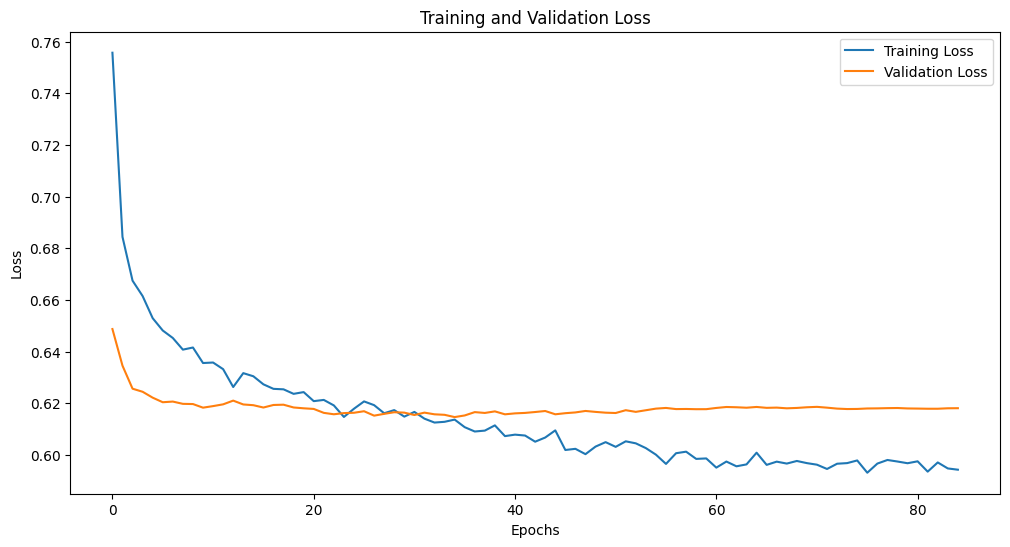

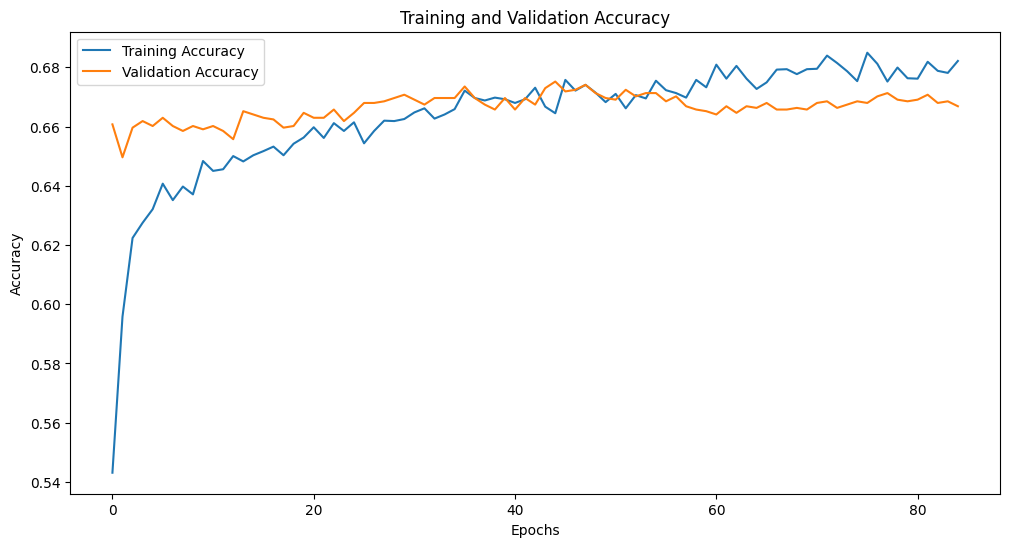

121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.6537762782247599
Confusion Matrix: 
[[ 329 1030]
 [ 304 2190]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.52      0.24      0.33      1359
           1       0.68      0.88      0.77      2494

    accuracy                           0.65      3853
   macro avg       0.60      0.56      0.55      3853
weighted avg       0.62      0.65      0.61      3853

Log Loss: 0.6215913217188996


In [263]:
#  Model for Unjustified Stop
model_unjustified_stop = Sequential([
    Dense(128, input_shape = (x_train.shape[1],), activation = 'tanh'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation = "relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation = tf.keras.activations.elu),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation = 'sigmoid')
])

# Set the learning rate to vary 
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    patience=10,  # Number of epochs to wait before reducing the learning rate
    factor=0.5,  # Factor by which the learning rate will be reduced
    min_lr=0.00001  # Minimum learning rate
)

# Compile the model
model_unjustified_stop.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
               loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

# Train the model
history = model_unjustified_stop.fit(x_train, y_train["Unjustified_Stop"],
                    epochs = 1000,
                    batch_size = 128,
                    validation_split=0.2,
                    callbacks=[ tf.keras.callbacks.EarlyStopping(patience=50, restore_best_weights = True), lr_reduction]
  )

# Access the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Access the training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Predict on the test set
predictions = model_unjustified_stop.predict(x_test)
predicted_classes = (predictions > 0.5).astype(int)

# Calculate the accuracy
accuracy = accuracy_score(y_test["Unjustified_Stop"], predicted_classes)
print(f'Accuracy: {accuracy}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test["Unjustified_Stop"], predicted_classes)
print(f'Confusion Matrix: \n{conf_matrix}')

# Print the classification report
class_report = classification_report(y_test["Unjustified_Stop"], predicted_classes)
print(f'Classification Report: \n{class_report}')

# Print the log loss
log_loss_stop = log_loss(y_test["Unjustified_Stop"], predictions)
print(f'Log Loss: {log_loss_stop}')

Our model acheives a perfromance of 63% on the training set. This could be attributed to the large varaiblility of the stops themselves.

c:\Users\utilisateur\Desktop\McGill\MMA\INSY 662\insy662venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5951 - loss: 0.7571 - val_accuracy: 0.7024 - val_loss: 0.5946 - learning_rate: 0.0010
Epoch 2/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6707 - loss: 0.6290 - val_accuracy: 0.7208 - val_loss: 0.5677 - learning_rate: 0.0010
Epoch 3/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6703 - loss: 0.6219 - val_accuracy: 0.7175 - val_loss: 0.5566 - learning_rate: 0.0010
Epoch 4/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6832 - loss: 0.6055 - val_accuracy: 0.7202 - val_loss: 0.5539 - learning_rate: 0.0010
Epoch 5/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7020 - loss: 0.5872 - val_accuracy: 0.7241 - val_loss: 0.5548 - learning_rate: 0.0010
Epoch 6/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7025 - loss: 0.5831 - val_accuracy: 0.7225 - val_loss: 0.5510 - learning_rate: 0.0010
Epoch 7/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7028 - l

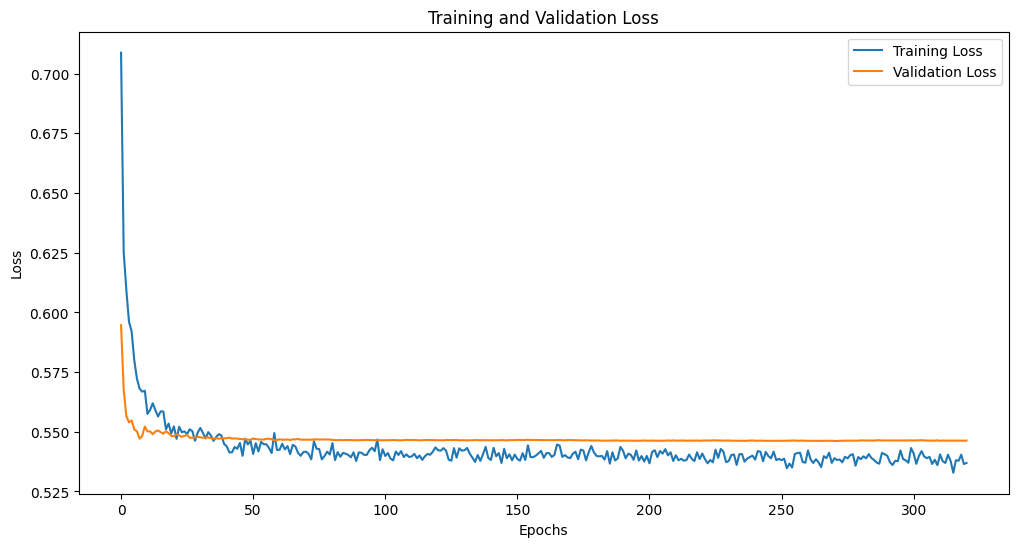

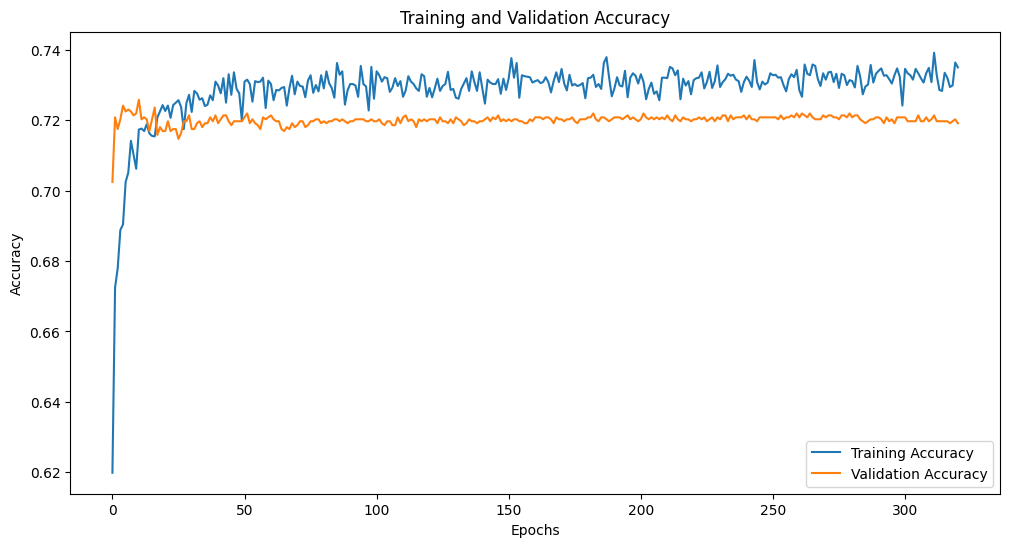

121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.7171035556709058
Confusion Matrix: 
[[1660  617]
 [ 473 1103]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      2277
           1       0.64      0.70      0.67      1576

    accuracy                           0.72      3853
   macro avg       0.71      0.71      0.71      3853
weighted avg       0.72      0.72      0.72      3853

Log Loss: 0.5472689230565003


In [264]:
# Model for Unjustified Frisk
model_unjustified_frisk = Sequential([
    Dense(128, input_shape = (x_train.shape[1],), activation = 'tanh'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, input_shape = (x_train.shape[1],), activation = 'relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(32, activation = tf.keras.activations.elu),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation = 'sigmoid')
])

# Set the learning rate to vary 
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    patience=10,  # Number of epochs to wait before reducing the learning rate
    factor=0.5,  # Factor by which the learning rate will be reduced
    min_lr=0.00001  # Minimum learning rate
)

# Compile the model
model_unjustified_frisk.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
               loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

# Train the model
history = model_unjustified_frisk.fit(x_train, y_train["Unjustified_Frisk"],
                    epochs = 1000,
                    batch_size = 64,
                    validation_split=0.2,
                    callbacks=[ tf.keras.callbacks.EarlyStopping(patience=50, restore_best_weights = True), lr_reduction]
  )

# Access the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Access the training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Predict on the test set
predictions = model_unjustified_frisk.predict(x_test)
predicted_classes = (predictions > 0.5).astype(int)

# Calculate the accuracy
accuracy = accuracy_score(y_test["Unjustified_Frisk"], predicted_classes)
print(f'Accuracy: {accuracy}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test["Unjustified_Frisk"], predicted_classes)
print(f'Confusion Matrix: \n{conf_matrix}')

# Print the classification report
class_report = classification_report(y_test["Unjustified_Frisk"], predicted_classes)
print(f'Classification Report: \n{class_report}')

# Print the log loss
log_loss_frisk = log_loss(y_test["Unjustified_Frisk"], predictions)
print(f'Log Loss: {log_loss_frisk}')


In [265]:
from imblearn.over_sampling import SMOTE

Due to the large imbalance of the target variable, the model would simply predict all of the searches as justified. In order to try to make the model learn the underlying reason for a justified or unjustified search I will use SMOTE in order to rebalance the data

In [266]:
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train["Unjustified_Search"])

c:\Users\utilisateur\Desktop\McGill\MMA\INSY 662\insy662venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5336 - loss: 1.1685 - recall: 0.4697 - val_accuracy: 0.7291 - val_loss: 0.6141 - val_recall: 0.2786 - learning_rate: 0.0010
Epoch 2/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6306 - loss: 1.0481 - recall: 0.3844 - val_accuracy: 0.7575 - val_loss: 0.5870 - val_recall: 0.2519 - learning_rate: 0.0010
Epoch 3/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6745 - loss: 1.0009 - recall: 0.3950 - val_accuracy: 0.7408 - val_loss: 0.5850 - val_recall: 0.3015 - learning_rate: 0.0010
Epoch 4/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6892 - loss: 0.9677 - recall: 0.4155 - val_accuracy: 0.6657 - val_loss: 0.6122 - val_recall: 0.3779 - learning_rate: 0.0010
Epoch 5/1000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6822 - loss: 0.9983 - recall: 0.4039 - val_accuracy: 0.6902 - val_loss: 0.6026 - val_recall: 0.3473 - learning_rate: 0.0010
Epoch 6/1000
113/113 ━━━━━━━━━━━━━━━━━━

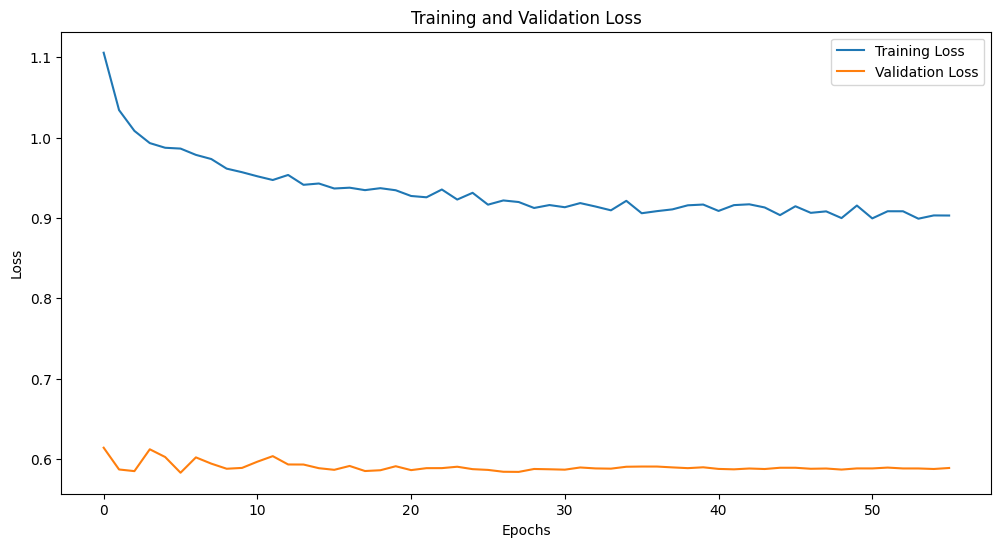

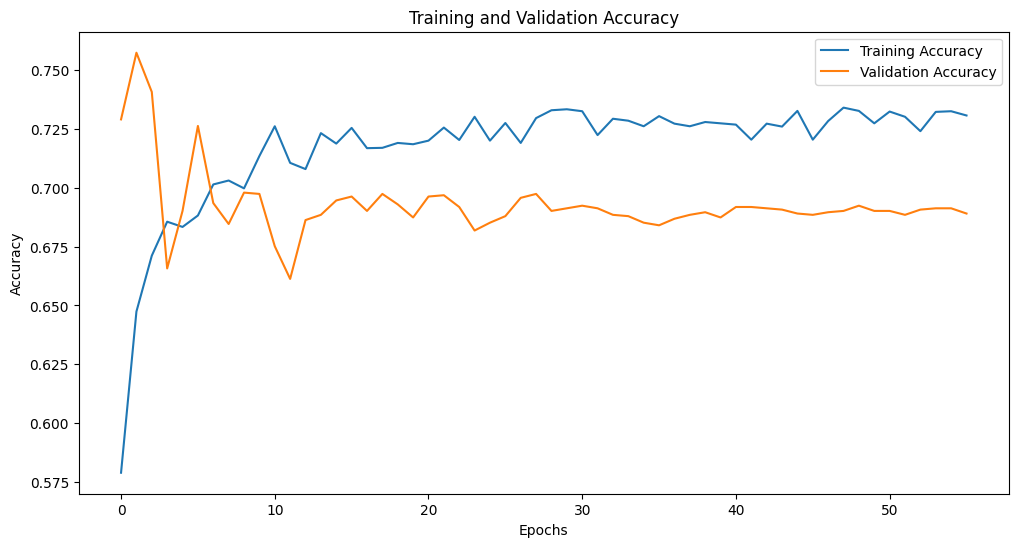

121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.7469504282377368
Confusion Matrix: 
[[2693  610]
 [ 365  185]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      3303
           1       0.23      0.34      0.28       550

    accuracy                           0.75      3853
   macro avg       0.56      0.58      0.56      3853
weighted avg       0.79      0.75      0.77      3853

Log Loss: 0.5728552520974534


In [267]:
# Model for Unjustified Search
y_train_unjustified_search = y_train["Unjustified_Search"]
y_train_unjustified_search = y_train_unjustified_search.astype(int)

x_train = x_train.reset_index(drop=True)
y_train_unjustified_search = y_train_unjustified_search.reset_index(drop=True)

model_unjustified_search = Sequential([
    Dense(128, input_shape = (x_train.shape[1],), activation = 'tanh'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.15),

    Dense(32, activation = tf.keras.activations.elu),
    BatchNormalization(),
    Dropout(0.15),

    Dense(1, activation = 'sigmoid')
])

# Set the learning rate to vary 
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    patience=7,  # Number of epochs to wait before reducing the learning rate
    factor=0.5,  # Factor by which the learning rate will be reduced
    min_lr=0.00001  # Minimum learning rate
)

# Compile the model
model_unjustified_search.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
               loss = 'binary_crossentropy',
                 metrics = ['accuracy', 'recall'])

# Train the model
history = model_unjustified_search.fit(x_train, y_train_unjustified_search,
                    epochs = 1000,
                    batch_size = 64,
                    validation_split=0.2,
                    class_weight={0: 1, 1: 4},
                    callbacks=[ tf.keras.callbacks.EarlyStopping(patience=50, restore_best_weights = True), lr_reduction]
                    )

# Access the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Access the training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Predict on the test set
predictions = model_unjustified_search.predict(x_test)
predicted_classes = (predictions > 0.5).astype(int)

# Calculate the accuracy
accuracy = accuracy_score(y_test["Unjustified_Search"], predicted_classes)
print(f'Accuracy: {accuracy}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test["Unjustified_Search"], predicted_classes)
print(f'Confusion Matrix: \n{conf_matrix}')

# Print the classification report
class_report = classification_report(y_test["Unjustified_Search"], predicted_classes)
print(f'Classification Report: \n{class_report}')

# Print the log loss
log_loss_frisk = log_loss(y_test["Unjustified_Search"], predictions)
print(f'Log Loss: {log_loss_frisk}')


# SHAP

In [268]:
import shap
import numpy as np
import matplotlib.pyplot as plt

c:\Users\utilisateur\Desktop\McGill\MMA\INSY 662\insy662venv\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
c:\Users\utilisateur\Desktop\McGill\MMA\INSY 662\insy662venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor_530. Received: the structure of inputs=['*']
  warnings.warn(


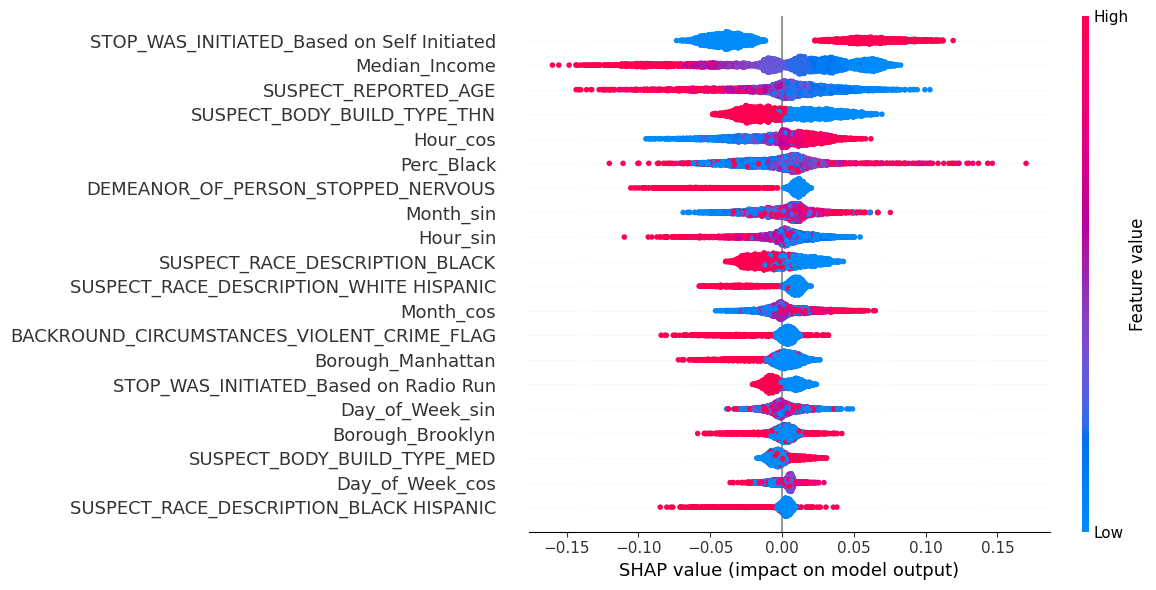

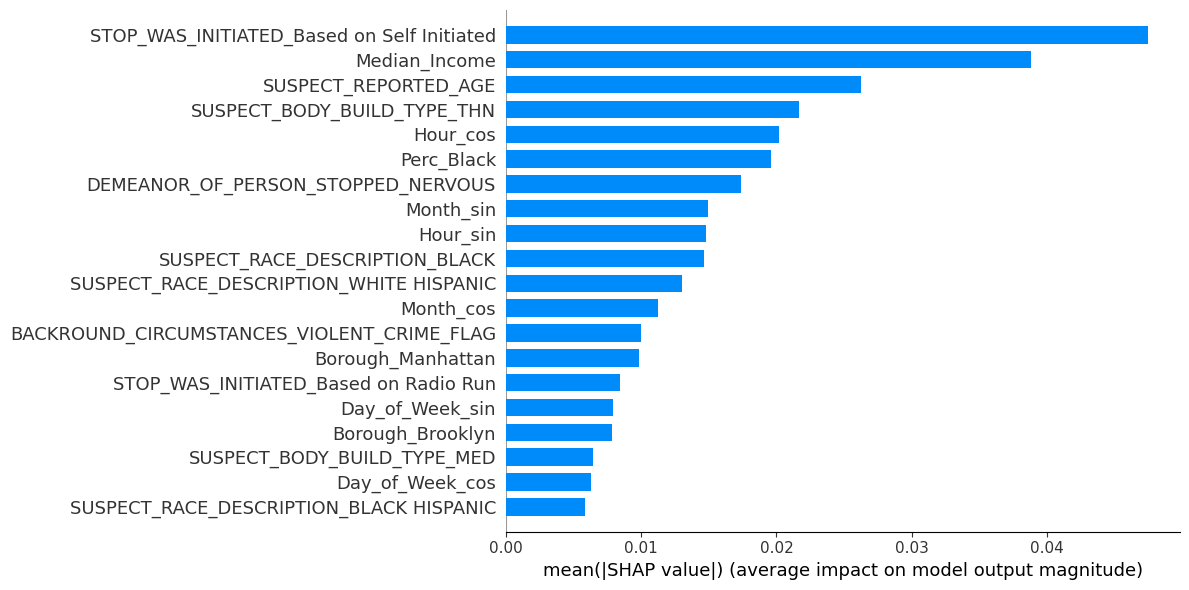

Expected Value: 0.6320165395736694
(55,)
(55,)


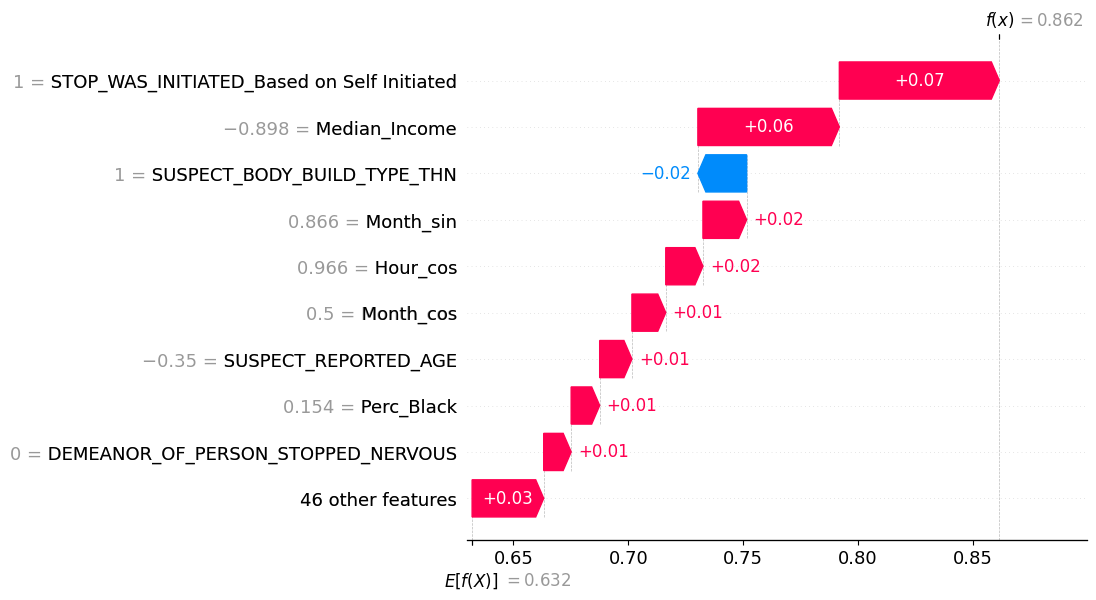

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG                 0.000000
SUSPECT_REPORTED_AGE                                      -0.189398
Median_Income                                             -0.469757
Perc_Black                                                 0.379997
Hour_sin                                                   0.000000
Hour_cos                                                   0.000000
Day_of_Week_sin                                            0.000000
Day_of_Week_cos                                            0.000000
Month_sin                                                  0.000000
Month_cos                                                  0.000000
STOP_WAS_INITIATED_Based on Radio Run                      0.000000
STOP_WAS_INITIATED_Based on Self Initiated                 1.000000
ISSUING_OFFICER_RANK_DI                                    0.000000
ISSUING_OFFICER_RANK_DT2                                   0.000000
ISSUING_OFFICER_RANK_DT3                        

BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG                 0.000000
SUSPECT_REPORTED_AGE                                       0.053680
Median_Income                                              0.136450
Perc_Black                                                -0.112466
Hour_sin                                                   0.000000
Hour_cos                                                   0.000000
Day_of_Week_sin                                            0.000000
Day_of_Week_cos                                            0.000000
Month_sin                                                  0.000000
Month_cos                                                  0.000000
STOP_WAS_INITIATED_Based on Radio Run                      1.000000
STOP_WAS_INITIATED_Based on Self Initiated                 0.000000
ISSUING_OFFICER_RANK_DI                                    0.000000
ISSUING_OFFICER_RANK_DT2                                   0.000000
ISSUING_OFFICER_RANK_DT3                        

(55,)
(55,)
(55,)
(55,)


c:\Users\utilisateur\Desktop\McGill\MMA\INSY 662\insy662venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor_530. Received: the structure of inputs=['*']
  warnings.warn(


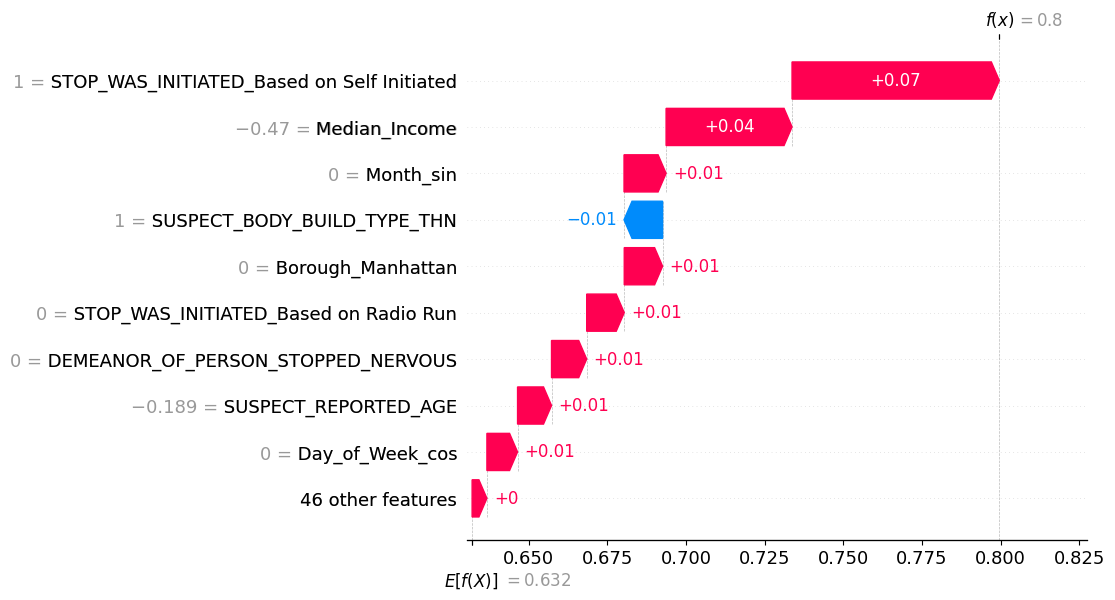

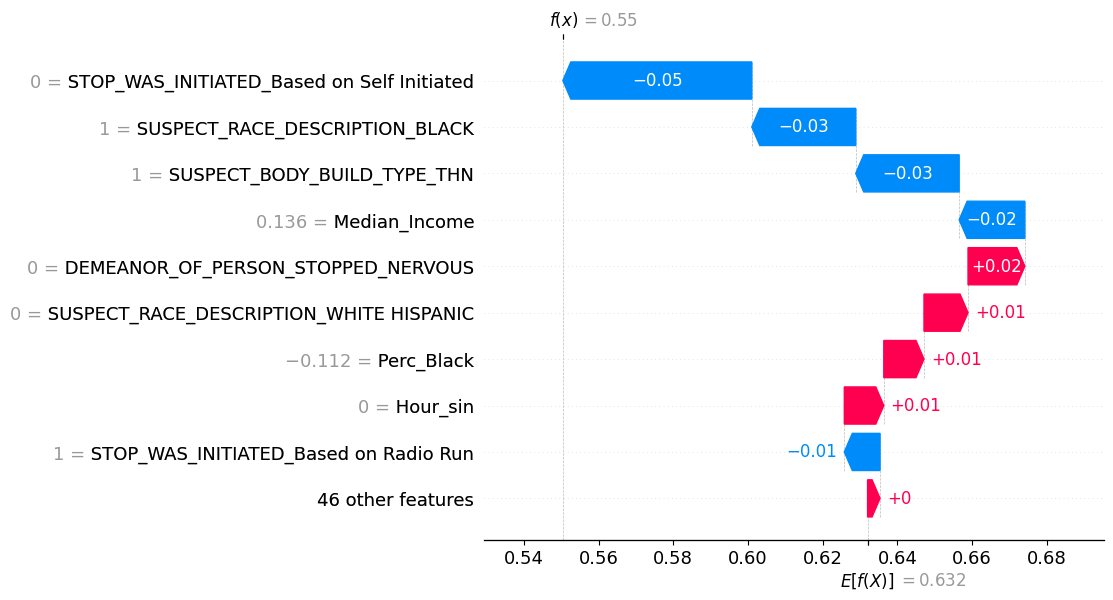

In [286]:
# Convert data to NumPy arrays if needed
x_train_vals = x_train.values if isinstance(x_train, pd.DataFrame) else x_train
x_test_vals = x_test.values if isinstance(x_test, pd.DataFrame) else x_test

# Create a background dataset (subset of x_train)
background_data = x_train_vals[:100]

# Initialize SHAP Deep Explainer
explainer = shap.DeepExplainer(model_unjustified_stop, background_data)

# Compute SHAP values for x_test
shap_values = explainer.shap_values(x_test_vals)
shap_values_squeezed = np.squeeze(shap_values)

shap.summary_plot(
    shap_values_squeezed, 
    x_test, 
    max_display=20, 
    plot_size=(12, 6)  # Increase the width (x-axis scale) and height (y-axis)
)

shap.summary_plot(
    shap_values_squeezed, 
    x_test, 
    max_display=20, 
    plot_type='bar',
    plot_size=(12, 6)  # Increase the width (x-axis scale) and height (y-axis)
)
# Choose an instance to analyze (e.g., the first instance in the test dataset)
instance_index = 0
shap_instance_values = shap_values_squeezed[instance_index]  # SHAP values for the chosen instance
feature_values = x_test_vals[instance_index]  # Feature values for the chosen instance
expected_value = float(explainer.expected_value)  # Model's base value (for binary classification)

print(f'Expected Value: {expected_value}')
print(shap_instance_values.shape)
print(feature_values.shape)
# Create the waterfall plot
shap.waterfall_plot(
    shap.Explanation(
        values=shap_instance_values,  # SHAP values for the chosen instance
        base_values=expected_value,   # Model's expected value
        data=feature_values,          # Feature values for the chosen instance
        feature_names=x_test.columns.tolist()  # Feature names (if x_test is a DataFrame)
    )
)
# Create a typical profile for the instances that was predcited as unjustified stop vs justified stop
predictions = model_unjustified_search.predict(x_test)
predicted_classes = (predictions > 0.5).astype(int)

# Get the indices of instances predicted as unjustified stop
unjustified_stop_indices = np.where(predicted_classes == 1)[0]

# Get the indices of instances predicted as justified stop
justified_stop_indices = np.where(predicted_classes == 0)[0]

# Create a pd series corresponding to the mean values for the continuous features and the most likely class for the categorical features 
mean_values_unjustified_stop = x_test.iloc[unjustified_stop_indices].mean()
for col in x_test.columns:
    if col not in continuous_columns:
        mean_values_unjustified_stop[col] = 1 if mean_values_unjustified_stop[col] > 0.5 else 0

display(mean_values_unjustified_stop)

mean_values_justified_stop = x_test.iloc[justified_stop_indices].mean()
for col in x_test.columns:
    if col not in continuous_columns:
        mean_values_justified_stop[col] = 1 if mean_values_justified_stop[col] > 0.5 else 0

display(mean_values_justified_stop)
# Convert the mean values of the profiles into numpy arrays (they should be of the same shape as your data)
mean_values_unjustified_stop = np.array(mean_values_unjustified_stop)
mean_values_justified_stop = np.array(mean_values_justified_stop)

# Get the SHAP values for the unjustified stop profile
shap_values_unjustified = explainer.shap_values(mean_values_unjustified_stop.reshape(1, -1))  # Reshape for a single instance

# Get the SHAP values for the justified stop profile
shap_values_justified = explainer.shap_values(mean_values_justified_stop.reshape(1, -1))  # Reshape for a single instance

expected_value = float(explainer.expected_value)

# reshape the shap values to match the shape of the data
shap_values_unjustified = np.squeeze(shap_values_unjustified)
shap_values_justified = np.squeeze(shap_values_justified)

print(shap_values_unjustified.shape)
print(shap_values_justified.shape)
print(mean_values_unjustified_stop.shape)
print(mean_values_justified_stop.shape)
# Create the waterfall plot for unjustified stop profile
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_unjustified,  # SHAP values for the unjustified stop instance
        base_values=expected_value,  # Base value for the unjustified stop
        data=mean_values_unjustified_stop,  # Feature values for the unjustified stop instance
        feature_names=x_test.columns.tolist()  # Feature names
    )
)

# Create the waterfall plot for justified stop profile
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_justified,  # SHAP values for the justified stop instance
        base_values=expected_value,  # Base value for the justified stop
        data=mean_values_justified_stop,  # Feature values for the justified stop instance
        feature_names=x_test.columns.tolist()  # Feature names
    )
)

In [278]:
# SHAP analysis for unjustified frisk
# Convert data to NumPy arrays if needed
x_train_vals = x_train.values if isinstance(x_train, pd.DataFrame) else x_train
x_test_vals = x_test.values if isinstance(x_test, pd.DataFrame) else x_test

# Create a background dataset (subset of x_train)
background_data = x_train_vals[:100]

# Initialize SHAP Deep Explainer
explainer = shap.DeepExplainer(model_unjustified_frisk, background_data)

# Compute SHAP values for x_test
shap_values = explainer.shap_values(x_test_vals)
shap_values_squeezed = np.squeeze(shap_values)

c:\Users\utilisateur\Desktop\McGill\MMA\INSY 662\insy662venv\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
c:\Users\utilisateur\Desktop\McGill\MMA\INSY 662\insy662venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor_541. Received: the structure of inputs=['*']
  warnings.warn(


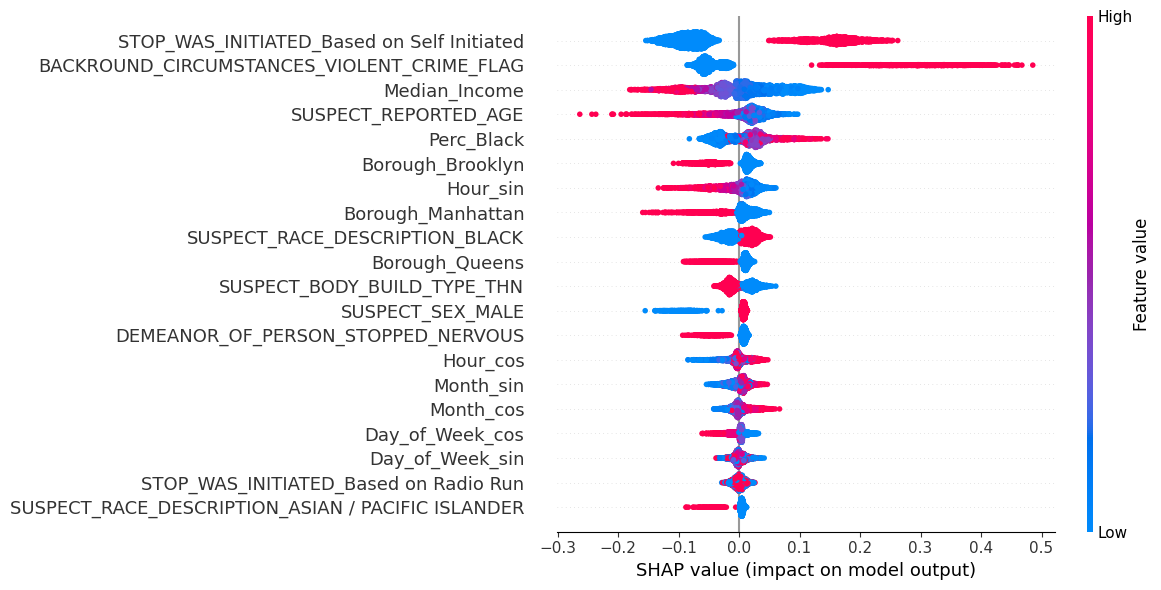

In [279]:
shap.summary_plot(
    shap_values_squeezed, 
    x_test, 
    max_display=20, 
    plot_size=(12, 6)  # Increase the width (x-axis scale) and height (y-axis)
)


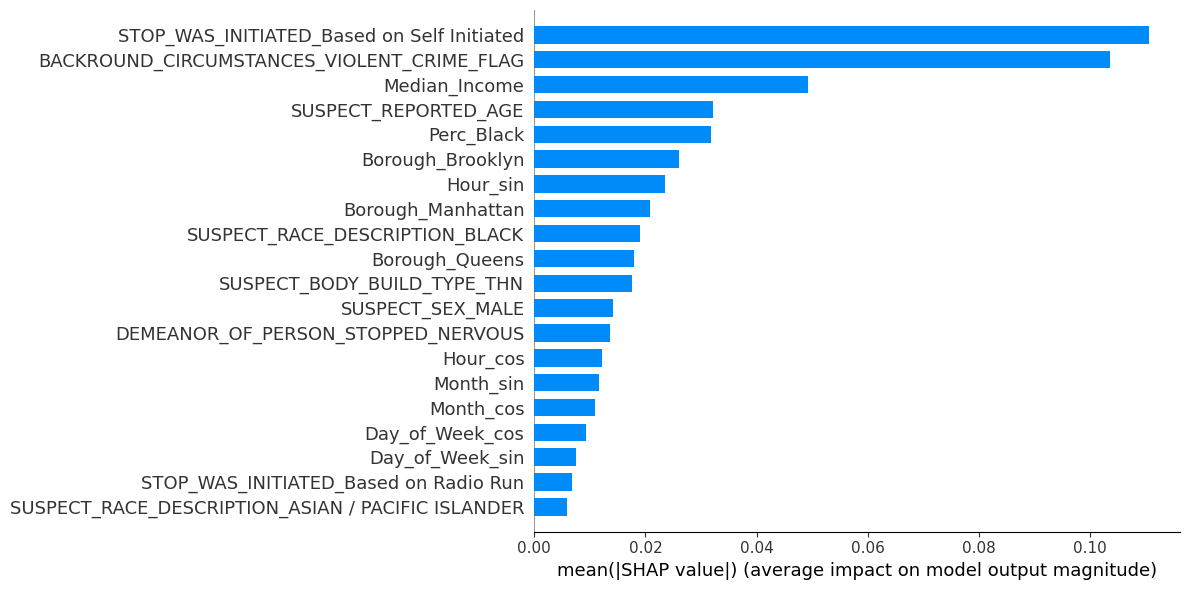

In [280]:
shap.summary_plot(
    shap_values_squeezed, 
    x_test, 
    max_display=20, 
    plot_type='bar',
    plot_size=(12, 6)  # Increase the width (x-axis scale) and height (y-axis)
)

Expected Value: 0.3678402304649353
(55,)
(55,)


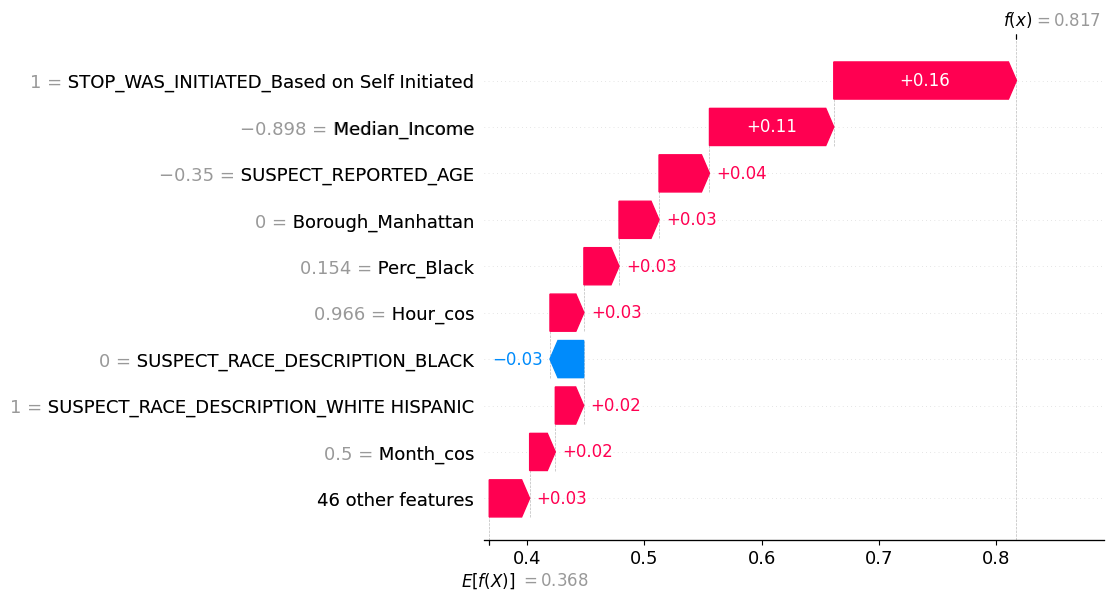

In [281]:
# Choose an instance to analyze (e.g., the first instance in the test dataset)
instance_index = 0
shap_instance_values = shap_values_squeezed[instance_index]  # SHAP values for the chosen instance
feature_values = x_test_vals[instance_index]  # Feature values for the chosen instance
expected_value = float(explainer.expected_value)  # Model's base value (for binary classification)

print(f'Expected Value: {expected_value}')
print(shap_instance_values.shape)
print(feature_values.shape)
# Create the waterfall plot
shap.waterfall_plot(
    shap.Explanation(
        values=shap_instance_values,  # SHAP values for the chosen instance
        base_values=expected_value,   # Model's expected value
        data=feature_values,          # Feature values for the chosen instance
        feature_names=x_test.columns.tolist()  # Feature names (if x_test is a DataFrame)
    )
)

In [282]:
# Create a typical profile for the instances that was predcited as unjustified stop vs justified stop
predictions = model_unjustified_frisk.predict(x_test)
predicted_classes = (predictions > 0.5).astype(int)

# Get the indices of instances predicted as unjustified stop
unjustified_stop_indices = np.where(predicted_classes == 1)[0]

# Get the indices of instances predicted as justified stop
justified_stop_indices = np.where(predicted_classes == 0)[0]

# Create a pd series corresponding to the mean values for the continuous features and the most likely class for the categorical features 
mean_values_unjustified_stop = x_test.iloc[unjustified_stop_indices].mean()
for col in x_test.columns:
    if col not in continuous_columns:
        mean_values_unjustified_stop[col] = 1 if mean_values_unjustified_stop[col] > 0.5 else 0

display(mean_values_unjustified_stop)

mean_values_justified_stop = x_test.iloc[justified_stop_indices].mean()
for col in x_test.columns:
    if col not in continuous_columns:
        mean_values_justified_stop[col] = 1 if mean_values_justified_stop[col] > 0.5 else 0

display(mean_values_justified_stop)

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG                 0.000000
SUSPECT_REPORTED_AGE                                      -0.309142
Median_Income                                             -0.385746
Perc_Black                                                 0.251141
Hour_sin                                                   0.000000
Hour_cos                                                   0.000000
Day_of_Week_sin                                            0.000000
Day_of_Week_cos                                            0.000000
Month_sin                                                  0.000000
Month_cos                                                  0.000000
STOP_WAS_INITIATED_Based on Radio Run                      0.000000
STOP_WAS_INITIATED_Based on Self Initiated                 1.000000
ISSUING_OFFICER_RANK_DI                                    0.000000
ISSUING_OFFICER_RANK_DT2                                   0.000000
ISSUING_OFFICER_RANK_DT3                        

BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG                 0.000000
SUSPECT_REPORTED_AGE                                       0.255653
Median_Income                                              0.331594
Perc_Black                                                -0.222122
Hour_sin                                                   0.000000
Hour_cos                                                   0.000000
Day_of_Week_sin                                            0.000000
Day_of_Week_cos                                            0.000000
Month_sin                                                  0.000000
Month_cos                                                  0.000000
STOP_WAS_INITIATED_Based on Radio Run                      1.000000
STOP_WAS_INITIATED_Based on Self Initiated                 0.000000
ISSUING_OFFICER_RANK_DI                                    0.000000
ISSUING_OFFICER_RANK_DT2                                   0.000000
ISSUING_OFFICER_RANK_DT3                        

In [283]:
# Convert the mean values of the profiles into numpy arrays (they should be of the same shape as your data)
mean_values_unjustified_stop = np.array(mean_values_unjustified_stop)
mean_values_justified_stop = np.array(mean_values_justified_stop)

# Get the SHAP values for the unjustified stop profile
shap_values_unjustified = explainer.shap_values(mean_values_unjustified_stop.reshape(1, -1))  # Reshape for a single instance

# Get the SHAP values for the justified stop profile
shap_values_justified = explainer.shap_values(mean_values_justified_stop.reshape(1, -1))  # Reshape for a single instance

expected_value = float(explainer.expected_value)

# reshape the shap values to match the shape of the data
shap_values_unjustified = np.squeeze(shap_values_unjustified)
shap_values_justified = np.squeeze(shap_values_justified)

print(shap_values_unjustified.shape)
print(shap_values_justified.shape)
print(mean_values_unjustified_stop.shape)
print(mean_values_justified_stop.shape)

(55,)
(55,)
(55,)
(55,)


c:\Users\utilisateur\Desktop\McGill\MMA\INSY 662\insy662venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor_541. Received: the structure of inputs=['*']
  warnings.warn(


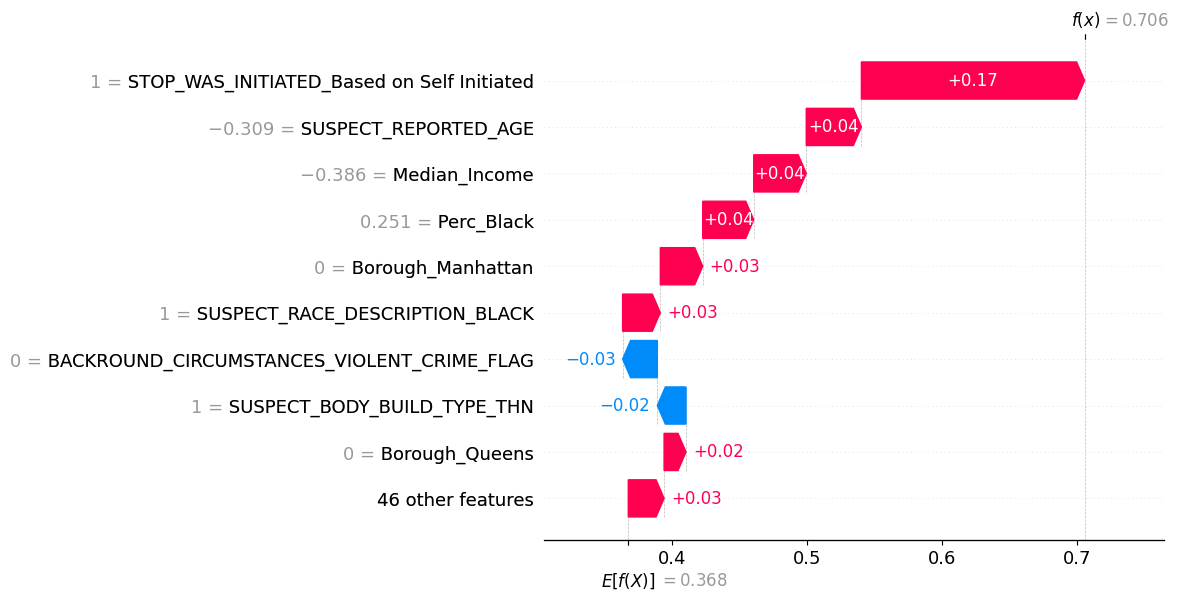

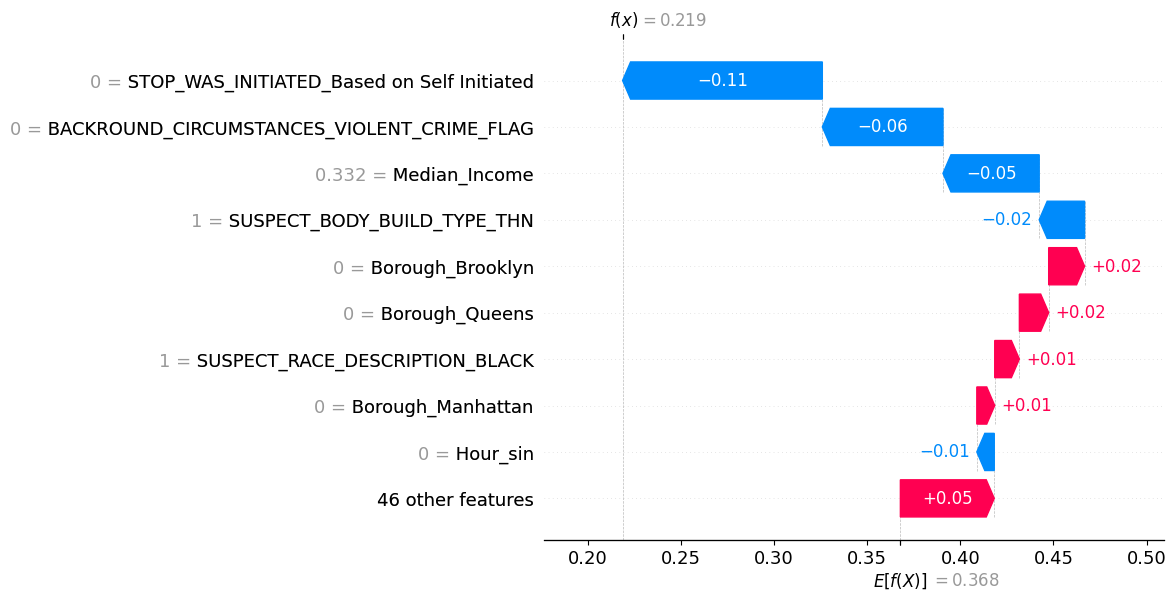

In [284]:
# Create the waterfall plot for unjustified stop profile
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_unjustified,  # SHAP values for the unjustified stop instance
        base_values=expected_value,  # Base value for the unjustified stop
        data=mean_values_unjustified_stop,  # Feature values for the unjustified stop instance
        feature_names=x_test.columns.tolist()  # Feature names
    )
)

# Create the waterfall plot for justified stop profile
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_justified,  # SHAP values for the justified stop instance
        base_values=expected_value,  # Base value for the justified stop
        data=mean_values_justified_stop,  # Feature values for the justified stop instance
        feature_names=x_test.columns.tolist()  # Feature names
    )
)

c:\Users\utilisateur\Desktop\McGill\MMA\INSY 662\insy662venv\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
c:\Users\utilisateur\Desktop\McGill\MMA\INSY 662\insy662venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor_552. Received: the structure of inputs=['*']
  warnings.warn(


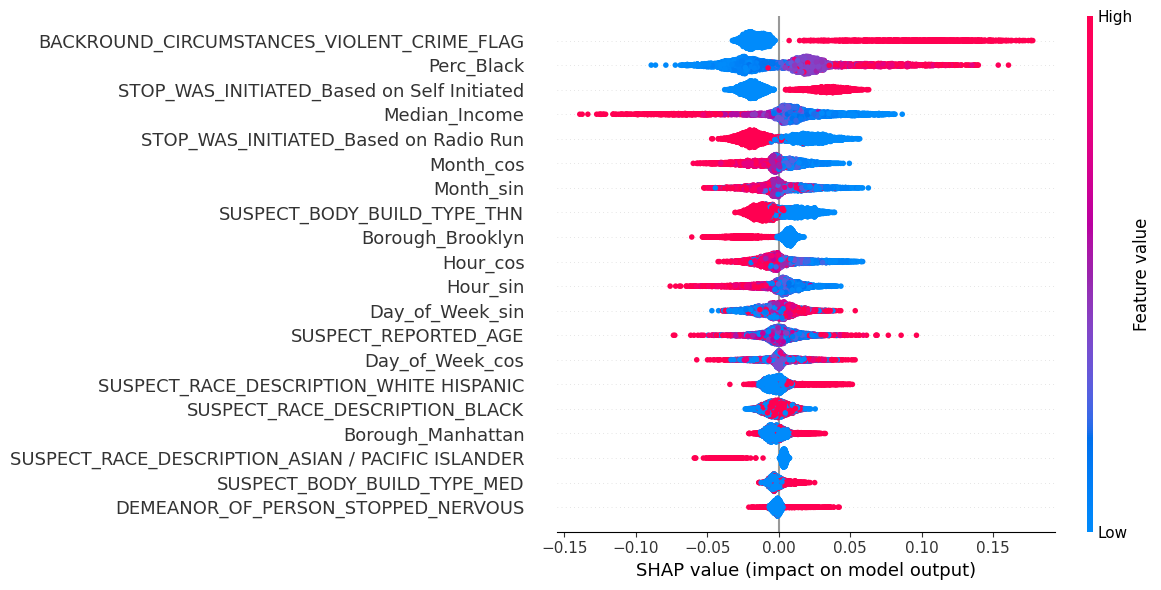

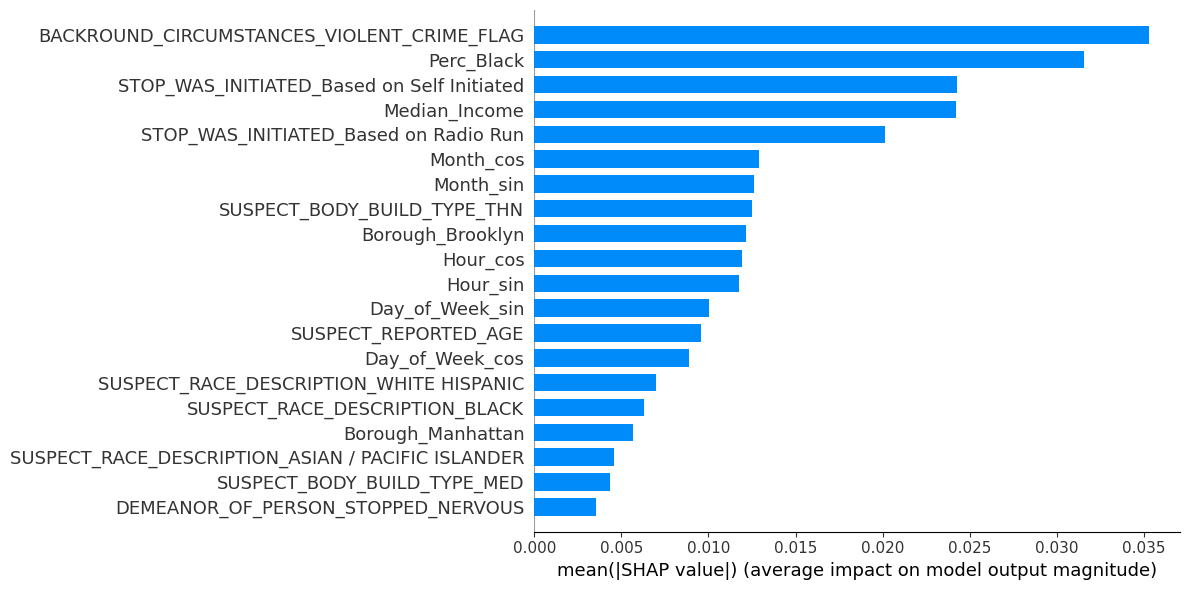

Expected Value: 0.3838725686073303
(55,)
(55,)


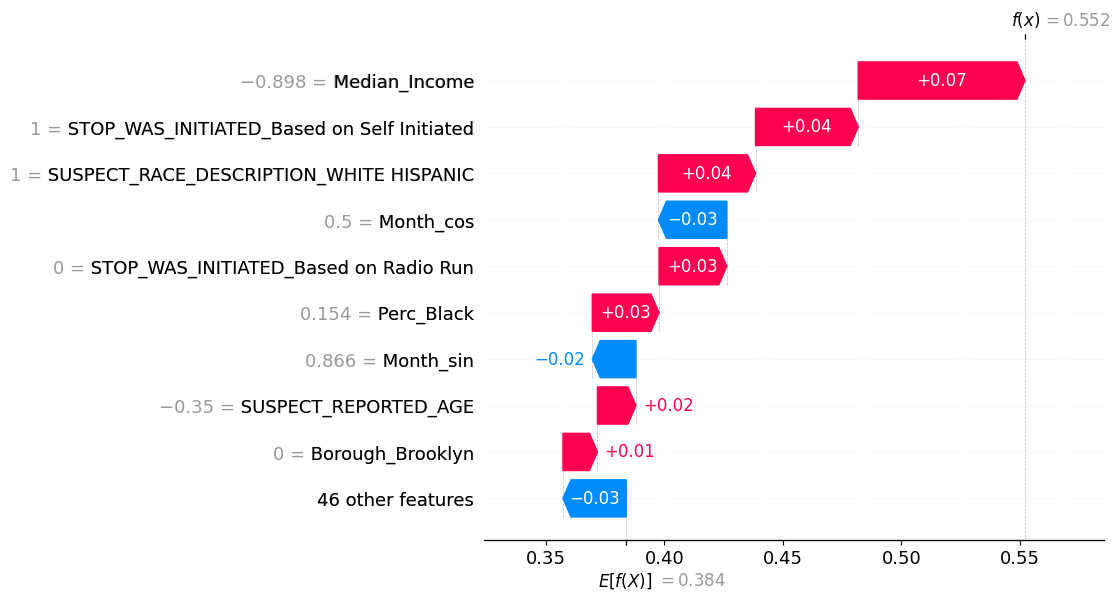

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG                 0.000000
SUSPECT_REPORTED_AGE                                      -0.189398
Median_Income                                             -0.469757
Perc_Black                                                 0.379997
Hour_sin                                                   0.000000
Hour_cos                                                   0.000000
Day_of_Week_sin                                            0.000000
Day_of_Week_cos                                            0.000000
Month_sin                                                  0.000000
Month_cos                                                  0.000000
STOP_WAS_INITIATED_Based on Radio Run                      0.000000
STOP_WAS_INITIATED_Based on Self Initiated                 1.000000
ISSUING_OFFICER_RANK_DI                                    0.000000
ISSUING_OFFICER_RANK_DT2                                   0.000000
ISSUING_OFFICER_RANK_DT3                        

BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG                 0.000000
SUSPECT_REPORTED_AGE                                       0.053680
Median_Income                                              0.136450
Perc_Black                                                -0.112466
Hour_sin                                                   0.000000
Hour_cos                                                   0.000000
Day_of_Week_sin                                            0.000000
Day_of_Week_cos                                            0.000000
Month_sin                                                  0.000000
Month_cos                                                  0.000000
STOP_WAS_INITIATED_Based on Radio Run                      1.000000
STOP_WAS_INITIATED_Based on Self Initiated                 0.000000
ISSUING_OFFICER_RANK_DI                                    0.000000
ISSUING_OFFICER_RANK_DT2                                   0.000000
ISSUING_OFFICER_RANK_DT3                        

(55,)
(55,)
(55,)
(55,)


c:\Users\utilisateur\Desktop\McGill\MMA\INSY 662\insy662venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor_552. Received: the structure of inputs=['*']
  warnings.warn(


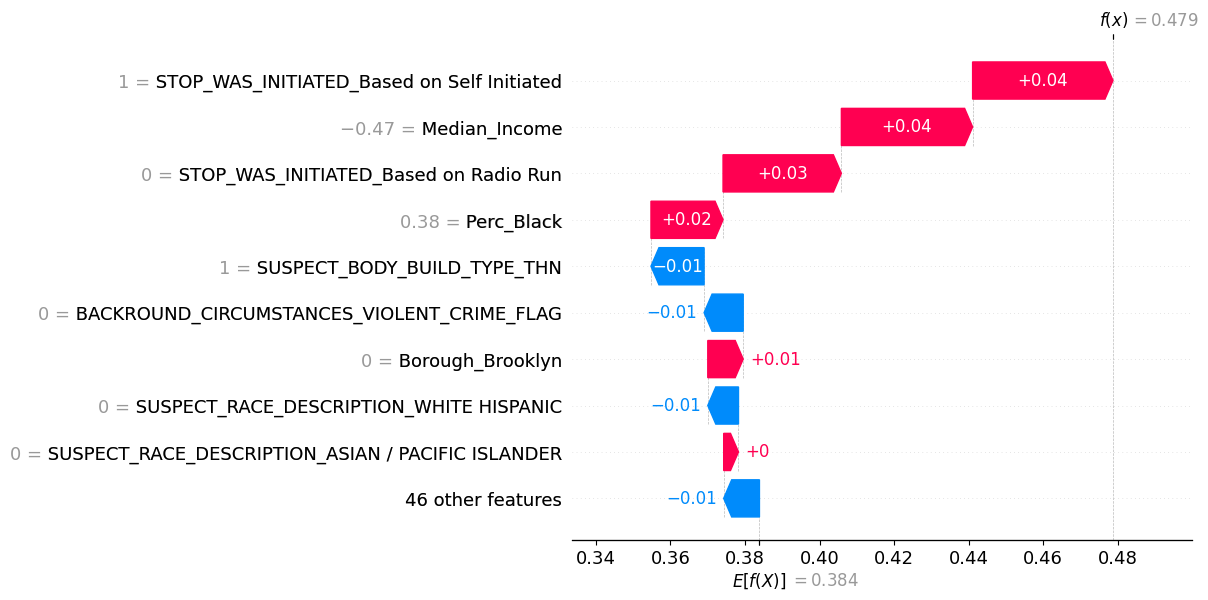

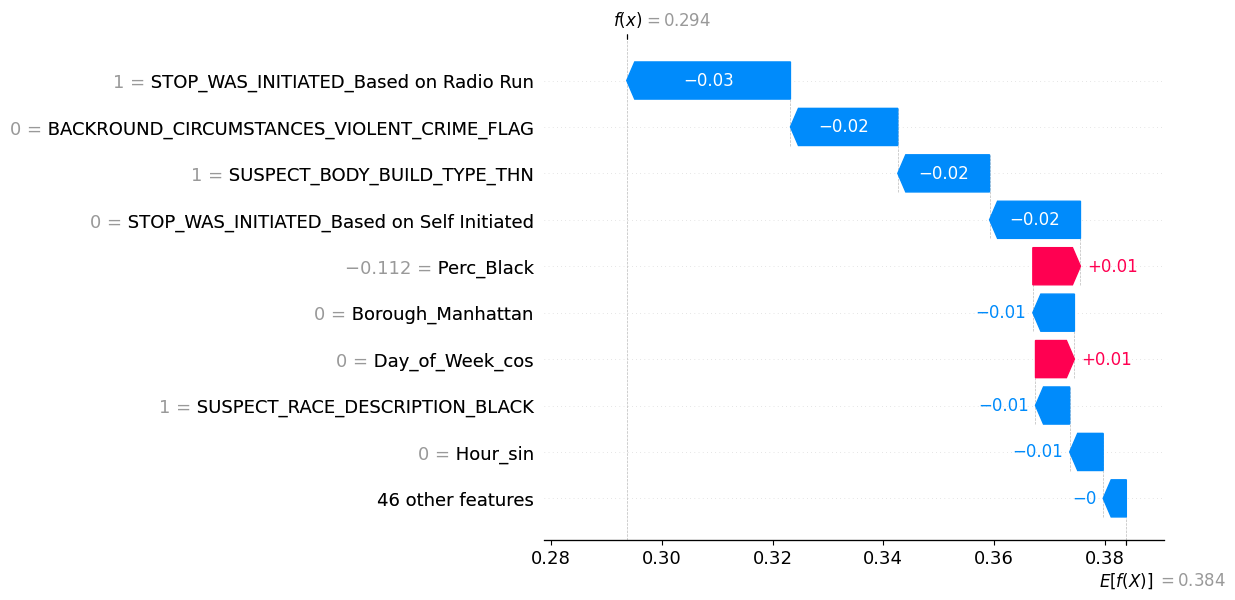

In [287]:
# Convert data to NumPy arrays if needed
x_train_vals = x_train.values if isinstance(x_train, pd.DataFrame) else x_train
x_test_vals = x_test.values if isinstance(x_test, pd.DataFrame) else x_test

# Create a background dataset (subset of x_train)
background_data = x_train_vals[:100]

# Initialize SHAP Deep Explainer
explainer = shap.DeepExplainer(model_unjustified_search, background_data)

# Compute SHAP values for x_test
shap_values = explainer.shap_values(x_test_vals)
shap_values_squeezed = np.squeeze(shap_values)

shap.summary_plot(
    shap_values_squeezed, 
    x_test, 
    max_display=20, 
    plot_size=(12, 6)  # Increase the width (x-axis scale) and height (y-axis)
)

shap.summary_plot(
    shap_values_squeezed, 
    x_test, 
    max_display=20, 
    plot_type='bar',
    plot_size=(12, 6)  # Increase the width (x-axis scale) and height (y-axis)
)
# Choose an instance to analyze (e.g., the first instance in the test dataset)
instance_index = 0
shap_instance_values = shap_values_squeezed[instance_index]  # SHAP values for the chosen instance
feature_values = x_test_vals[instance_index]  # Feature values for the chosen instance
expected_value = float(explainer.expected_value)  # Model's base value (for binary classification)

print(f'Expected Value: {expected_value}')
print(shap_instance_values.shape)
print(feature_values.shape)
# Create the waterfall plot
shap.waterfall_plot(
    shap.Explanation(
        values=shap_instance_values,  # SHAP values for the chosen instance
        base_values=expected_value,   # Model's expected value
        data=feature_values,          # Feature values for the chosen instance
        feature_names=x_test.columns.tolist()  # Feature names (if x_test is a DataFrame)
    )
)
# Create a typical profile for the instances that was predcited as unjustified stop vs justified stop
predictions = model_unjustified_search.predict(x_test)
predicted_classes = (predictions > 0.5).astype(int)

# Get the indices of instances predicted as unjustified stop
unjustified_stop_indices = np.where(predicted_classes == 1)[0]

# Get the indices of instances predicted as justified stop
justified_stop_indices = np.where(predicted_classes == 0)[0]

# Create a pd series corresponding to the mean values for the continuous features and the most likely class for the categorical features 
mean_values_unjustified_stop = x_test.iloc[unjustified_stop_indices].mean()
for col in x_test.columns:
    if col not in continuous_columns:
        mean_values_unjustified_stop[col] = 1 if mean_values_unjustified_stop[col] > 0.5 else 0

display(mean_values_unjustified_stop)

mean_values_justified_stop = x_test.iloc[justified_stop_indices].mean()
for col in x_test.columns:
    if col not in continuous_columns:
        mean_values_justified_stop[col] = 1 if mean_values_justified_stop[col] > 0.5 else 0

display(mean_values_justified_stop)
# Convert the mean values of the profiles into numpy arrays (they should be of the same shape as your data)
mean_values_unjustified_stop = np.array(mean_values_unjustified_stop)
mean_values_justified_stop = np.array(mean_values_justified_stop)

# Get the SHAP values for the unjustified stop profile
shap_values_unjustified = explainer.shap_values(mean_values_unjustified_stop.reshape(1, -1))  # Reshape for a single instance

# Get the SHAP values for the justified stop profile
shap_values_justified = explainer.shap_values(mean_values_justified_stop.reshape(1, -1))  # Reshape for a single instance

expected_value = float(explainer.expected_value)

# reshape the shap values to match the shape of the data
shap_values_unjustified = np.squeeze(shap_values_unjustified)
shap_values_justified = np.squeeze(shap_values_justified)

print(shap_values_unjustified.shape)
print(shap_values_justified.shape)
print(mean_values_unjustified_stop.shape)
print(mean_values_justified_stop.shape)
# Create the waterfall plot for unjustified stop profile
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_unjustified,  # SHAP values for the unjustified stop instance
        base_values=expected_value,  # Base value for the unjustified stop
        data=mean_values_unjustified_stop,  # Feature values for the unjustified stop instance
        feature_names=x_test.columns.tolist()  # Feature names
    )
)

# Create the waterfall plot for justified stop profile
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_justified,  # SHAP values for the justified stop instance
        base_values=expected_value,  # Base value for the justified stop
        data=mean_values_justified_stop,  # Feature values for the justified stop instance
        feature_names=x_test.columns.tolist()  # Feature names
    )
)

From these cells we see that the 